## Steps required
1. Input dataset to clip by
2. Clip/ zoom data to that area
3. Produce maps for each map group
4. Add legend, scale bar, north arrow to each map
5. Add source, title and information to each map

## Options for visualising
1. Plotly
    - couldn't find a way to add scale bar
2. Leaflet (ipyleaflet)
    - seems to be more for interactive notbook maps
3. Leaflet + folium

4. Matplotlib + basemap
    - couldn't install basemap
5. Matplotlib + Cartopy
    - felt quite complex, 


In [22]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd
import geopandas as gpd
from folium import plugins

In [7]:
wiltshire_border = gpd.read_file("G:/Administrative_Regions/CountyBoundary_WiltsSwindon.shp")

In [17]:
wiltshire_border = wiltshire_border.to_crs("EPSG:4326")

In [26]:
wiltshire_geojson = wiltshire_border.to_json()
m = folium.Map(location=[51.4, -1.9], zoom_start=9,control_scale = True, legend_name = 'TEst')

# Step 4: Add the Wiltshire boundary as GeoJSON to the map
folium.GeoJson(wiltshire_geojson, name = 'Wiltshire').add_to(m)

folium.LayerControl().add_to(m)

# Optional: Add a marker for reference
# folium.Marker([51.4, -1.9], popup="Wiltshire").add_to(m)
m

In [25]:
m.save("test.html")

In [ ]:
#Define coordinates of where we want to center our map
boulder_coords = [40.015, -105.2705]

#Create the map
my_map = folium.Map(location = boulder_coords, zoom_start = 13)

#Display the map
my_map

In [ ]:
#Define the coordinates we want our markers to be at
CU_Boulder_coords = [40.007153, -105.266930]
East_Campus_coords = [40.013501, -105.251889]
SEEC_coords = [40.009837, -105.241905]

#Add markers to the map
folium.Marker(CU_Boulder_coords, popup = 'CU Boulder').add_to(my_map)
folium.Marker(East_Campus_coords, popup = 'East Campus').add_to(my_map)
folium.Marker(SEEC_coords, popup = 'SEEC Building').add_to(my_map)

#Display the map
my_map

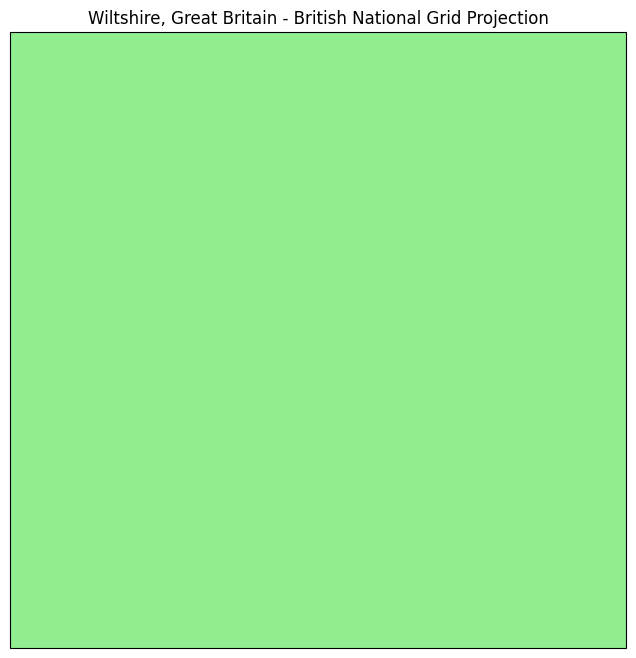

In [9]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a plot with OSGB projection
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': ccrs.OSGB()})

# Set extent in OSGB projection. 
# The extent can be in Easting/Northing for OSGB (this is in meters, not lat/lon)
# For a view of Wiltshire, approximate Easting/Northing bounds are around:
# Easting: 400000 to 500000, Northing: 150000 to 250000 (these are approximate grid coordinates for Wiltshire)

ax.set_extent([400000, 500000, 150000, 250000], crs=ccrs.OSGB())  # OSGB Easting/Northing bounds

# Add features (e.g., coastlines, borders)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgreen')

# Add a title
ax.set_title('Wiltshire, Great Britain - British National Grid Projection')

# Show the map
plt.show()

c:\temp\venvs\map-outputs-venv\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\temp\venvs\map-outputs-venv\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


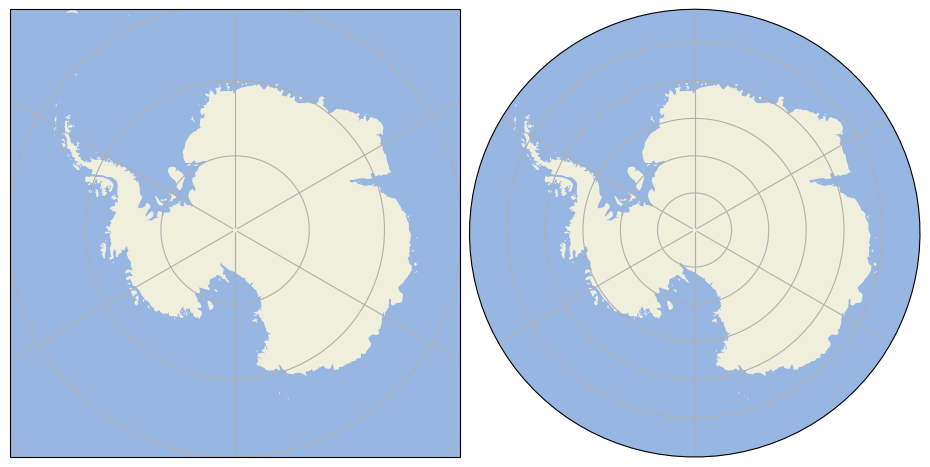

In [10]:
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature


fig = plt.figure(figsize=[10, 5])
ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.SouthPolarStereo())
ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.SouthPolarStereo(),
                        sharex=ax1, sharey=ax1)
fig.subplots_adjust(bottom=0.05, top=0.95,
                    left=0.04, right=0.95, wspace=0.02)

# Limit the map to -60 degrees latitude and below.
ax1.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.OCEAN)

ax1.gridlines()
ax2.gridlines()

ax2.add_feature(cfeature.LAND)
ax2.add_feature(cfeature.OCEAN)

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax2.set_boundary(circle, transform=ax2.transAxes)

plt.show()

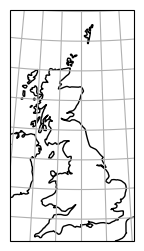

In [21]:
plt.figure(figsize=(2, 3))
ax = plt.axes(projection=ccrs.OSGB(
                        approx=False))
ax.coastlines(resolution='50m')
ax.gridlines()

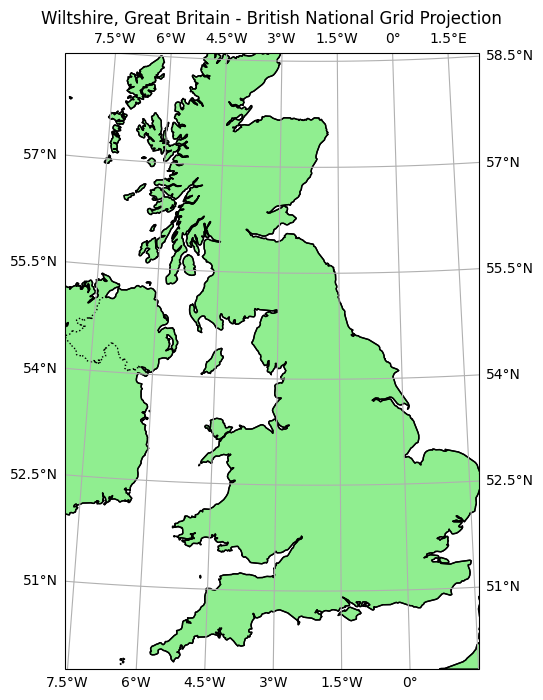

In [22]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy import config
import cartopy.io.shapereader as shpreader

# Create a plot with OSGB projection
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': ccrs.OSGB()})

# Set extent in PlateCarree (lat/lon) for Great Britain, then reproject using OSGB
# The coordinates for Great Britain in lat/lon
ax.set_extent([-7.6, 1.5, 49.5, 58.5], crs=ccrs.PlateCarree())  # In lat/lon

# Add some basic features: borders, coastlines, land
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgreen')
ax.add_feature(cfeature.COASTLINE, linewidth=1)

# Optionally, add a grid for better understanding
ax.gridlines(draw_labels=True)

# Title
ax.set_title('Wiltshire, Great Britain - British National Grid Projection')

# Show the map
plt.show()